In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,mean_absolute_error as mae,mean_squared_error as mse
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [2]:
#import csv file and printing first 5 values
df = pd.read_csv('Global Missing Migrants Dataset.csv')
df.head()

,Incident Type,Incident year,Reported Month,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping
0,Incident,2014,January,Central America,North America,Guatemala,1.0,0,1,0,0,1,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America
1,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America
2,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America
3,Incident,2014,January,Central America,North America,Mexico,1.0,0,1,0,0,1,0,Violence,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...","31.506777, -109.315632",Northern America
4,Incident,2014,January,Northern Africa,Europe,Sudan,1.0,0,1,2,0,1,0,Harsh environmental conditions / lack of adequ...,NaN,Border between Russia and Estonia,EUBusiness (Agence France-Presse),"59.1551, 28",Northern Europe


In [3]:
#shaping array
np.shape(df)

(13020, 19)

In [4]:
#printnig information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13020 entries, 0 to 13019
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Incident Type                        13020 non-null  object 
 1   Incident year                        13020 non-null  int64  
 2   Reported Month                       13020 non-null  object 
 3   Region of Origin                     12998 non-null  object 
 4   Region of Incident                   13020 non-null  object 
 5   Country of Origin                    13012 non-null  object 
 6   Number of Dead                       12470 non-null  float64
 7   Minimum Estimated Number of Missing  13020 non-null  int64  
 8   Total Number of Dead and Missing     13020 non-null  int64  
 9   Number of Survivors                  13020 non-null  int64  
 10  Number of Females                    13020 non-null  int64  
 11  Number of Males             

In [5]:
#returns the description of dataframe in transpose form
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Incident year,13020.0,2019.060753,2.418738,2014.0,2017.0,2019.0,2021.0,2023.0
Number of Dead,12470.0,2.623737,9.728163,0.0,1.0,1.0,2.0,750.0
Minimum Estimated Number of Missing,13020.0,1.904378,15.645297,-2.0,0.0,0.0,0.0,750.0
Total Number of Dead and Missing,13020.0,4.417281,19.950630,1.0,1.0,1.0,2.0,1022.0
Number of Survivors,13020.0,6.553763,42.315444,-2.0,0.0,0.0,0.0,1950.0
Number of Females,13020.0,0.458372,2.853658,0.0,0.0,0.0,0.0,94.0
Number of Males,13020.0,1.116052,3.811134,0.0,0.0,1.0,1.0,135.0
Number of Children,13020.0,0.238095,2.417196,0.0,0.0,0.0,0.0,250.0


In [6]:
#Calculating all the non-unique value
df.nunique()

Incident Type                             4
Incident year                            10
Reported Month                           12
Region of Origin                         33
Region of Incident                       16
Country of Origin                       335
Number of Dead                           86
Minimum Estimated Number of Missing     120
Total Number of Dead and Missing        137
Number of Survivors                     228
Number of Females                        48
Number of Males                          59
Number of Children                       20
Cause of Death                           15
Migration route                          25
Location of death                      7460
Information Source                     3803
Coordinates                            9582
UNSD Geographical Grouping               19
dtype: int64

DATA CLEANING

In [7]:
#handling missing values
df.isnull().sum()

Incident Type                             0
Incident year                             0
Reported Month                            0
Region of Origin                         22
Region of Incident                        0
Country of Origin                         8
Number of Dead                          550
Minimum Estimated Number of Missing       0
Total Number of Dead and Missing          0
Number of Survivors                       0
Number of Females                         0
Number of Males                           0
Number of Children                        0
Cause of Death                            0
Migration route                        3021
Location of death                         0
Information Source                        8
Coordinates                              36
UNSD Geographical Grouping                1
dtype: int64

In [8]:
#dropping unnecessary columns
c=['Information Source','Coordinates','UNSD Geographical Grouping']
df=df.drop(columns=c, axis=1)

In [9]:
#replaces the NULL values with a specified value
df["Migration route"].fillna(df["Migration route"].mode()[0], inplace=True)

In [10]:
df["Number of Dead"].mode()

0    1.0
Name: Number of Dead, dtype: float64

In [11]:
df["Number of Dead"].fillna(df["Number of Dead"].mode()[0], inplace=True)

In [12]:
df["Region of Origin"].mode()

0    Latin America / Caribbean (P)
Name: Region of Origin, dtype: object

In [13]:
df["Region of Origin"].fillna(df["Region of Origin"].mode()[0], inplace=True)

In [14]:
#Checking if there is any null value left
df.isnull().sum()

Incident Type                          0
Incident year                          0
Reported Month                         0
Region of Origin                       0
Region of Incident                     0
Country of Origin                      8
Number of Dead                         0
Minimum Estimated Number of Missing    0
Total Number of Dead and Missing       0
Number of Survivors                    0
Number of Females                      0
Number of Males                        0
Number of Children                     0
Cause of Death                         0
Migration route                        0
Location of death                      0
dtype: int64

### Data Analysis

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Incident year,13020.0,2019.060753,2.418738,2014.0,2017.0,2019.0,2021.0,2023.0
Number of Dead,13020.0,2.555146,9.526058,0.0,1.0,1.0,2.0,750.0
Minimum Estimated Number of Missing,13020.0,1.904378,15.645297,-2.0,0.0,0.0,0.0,750.0
Total Number of Dead and Missing,13020.0,4.417281,19.950630,1.0,1.0,1.0,2.0,1022.0
Number of Survivors,13020.0,6.553763,42.315444,-2.0,0.0,0.0,0.0,1950.0
Number of Females,13020.0,0.458372,2.853658,0.0,0.0,0.0,0.0,94.0
Number of Males,13020.0,1.116052,3.811134,0.0,0.0,1.0,1.0,135.0
Number of Children,13020.0,0.238095,2.417196,0.0,0.0,0.0,0.0,250.0


In [16]:
np.shape(df)

(13020, 16)

In [17]:
#returning a series that contain counts of unique values
df['Number of Dead'].value_counts()

Number of Dead
1.0      9464
2.0      1386
3.0       676
4.0       297
5.0       220
         ... 
133.0       1
120.0       1
204.0       1
97.0        1
80.0        1
Name: count, Length: 86, dtype: int64

In [18]:
df['Number of Survivors'].value_counts()

Number of Survivors
0      10959
1        205
2        129
3        118
4         82
       ...  
122        1
118        1
162        1
250        1
132        1
Name: count, Length: 228, dtype: int64

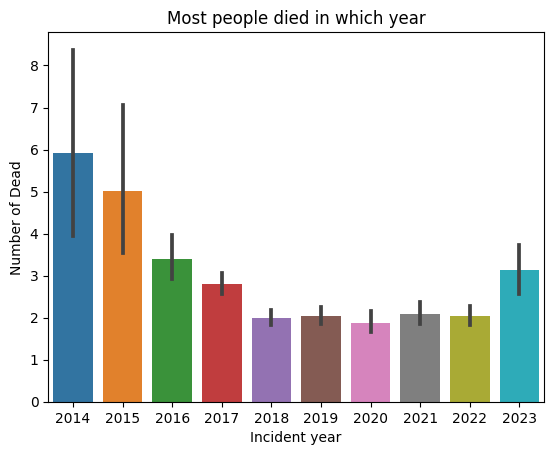

In [19]:
#Plotting a bar graph to find in which year most people died
sns.barplot(data=df, x='Incident year',y= 'Number of Dead')
plt.title('Most people died in which year');

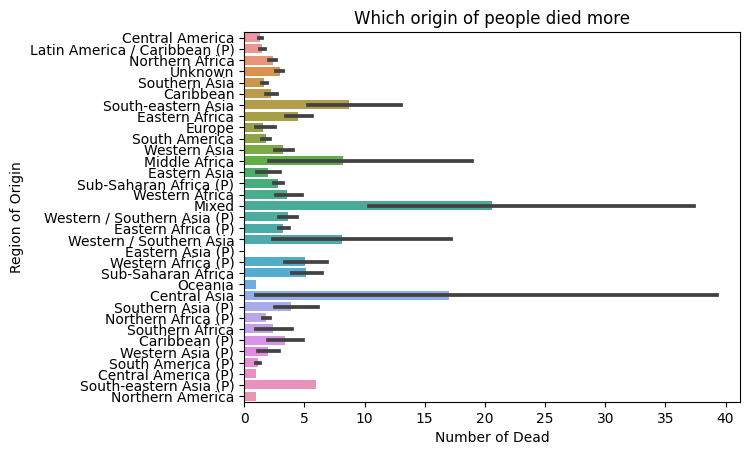

In [20]:
#Plotting a bar graph to find in which origin more people died
sns.barplot(data= df, x='Number of Dead',y= 'Region of Origin');
plt.title('Which origin of people died more');

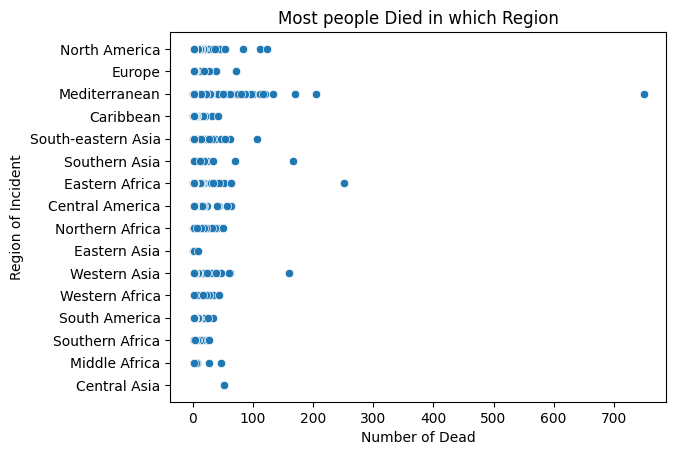

In [21]:
#Plotting a scatterplot to find in which region most people died
sns.scatterplot(data= df, x='Number of Dead',y= 'Region of Incident');
plt.title('Most people Died in which Region');

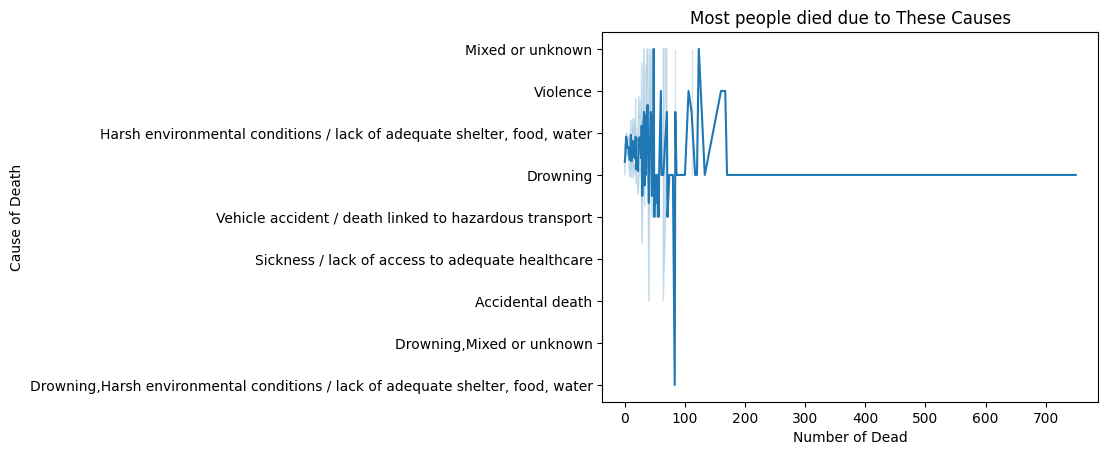

In [22]:
#Plotting a lineplot to find in due to which cause most people died
sns.lineplot(data= df, x='Number of Dead',y= 'Cause of Death');
plt.title('Most people died due to These Causes');

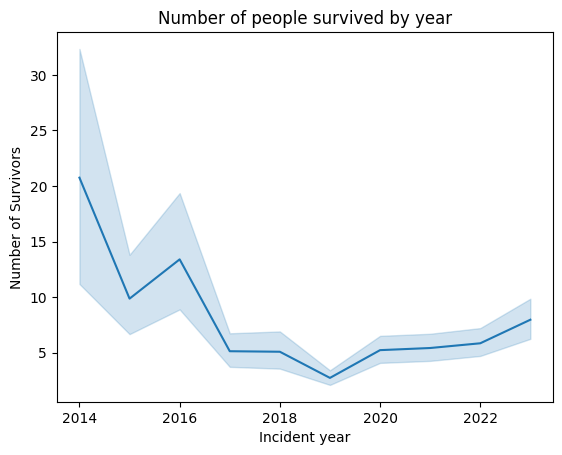

In [23]:
#Plotting a distribution plot to find number of people survived in which year 
sns.lineplot(data = df, x= 'Incident year', y = 'Number of Survivors')
plt.title('Number of people survived by year');

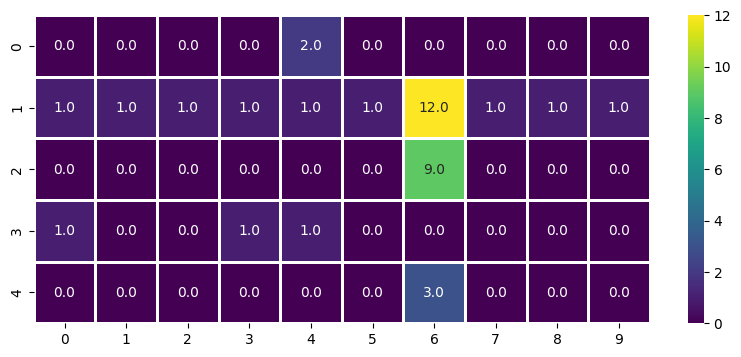

In [24]:
#Plotting a heatmap to find number of survivors and dead among males,females and children 
a=[ df['Number of Survivors'].iloc[:10],df['Number of Dead'].iloc[:10],
   df['Number of Females'].iloc[:10],df['Number of Males'].iloc[:10],df['Number of Children'].iloc[:10]]
ax = plt.subplots(figsize=(10,4))
sns.heatmap(a,square=True,annot=True,fmt=".1f", linewidth=1,cmap='viridis')
plt.show()

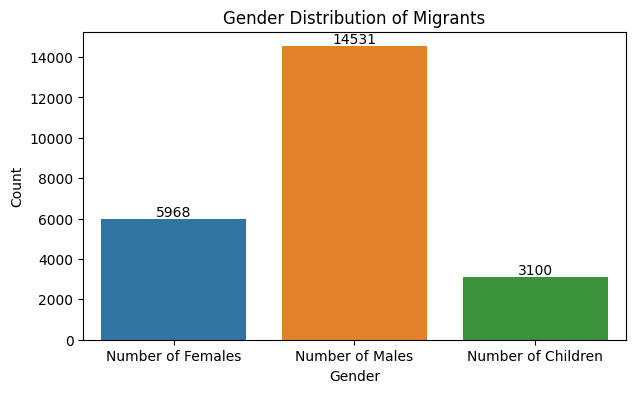

In [25]:
#Plotting a bargraph to find gender distribution of migrants
gender_counts = df[['Number of Females', 'Number of Males', 'Number of Children']].sum()
# Create a DataFrame for plotting
gender_data = pd.DataFrame({
    'Gender': gender_counts.index,
    'Count': gender_counts.values
})
# Create a bar plot using Seaborn
plt.figure(figsize=(7, 4))
ax = sns.barplot(x='Gender', y='Count', data=gender_data)
for bars in ax.containers:
    ax.bar_label(bars)
# Add title and labels
plt.title("Gender Distribution of Migrants")
plt.xlabel("Gender")
plt.ylabel("Count")
# Show the plot
plt.show()

REMOVING OUTLIERS

In [26]:
mean=np.mean(df['Number of Dead'])
std=np.std(df['Number of Dead'])
print("Mean of number of dead in dataset = " ,mean)
print("Standard deviation of number of dead in dataset = " ,std)

Mean of number of dead in dataset =  2.555145929339478
Standard deviation of number of dead in dataset =  9.525692500046006


In [27]:
Q1=df['Number of Dead'].quantile(0.25)
Q2=df['Number of Dead'].quantile(0.50)
Q3=df['Number of Dead'].quantile(0.75)
IQR=Q3-Q1
print("Q1 25 percentile of Number of Dead = ",Q1)
print("Q2 50 percentile of Number of Dead = ",Q2)
print("Q3 75 percentile of Number of Dead = ",Q3)
print("Interquartile range of Number of Dead = ",IQR)

Q1 25 percentile of Number of Dead =  1.0
Q2 50 percentile of Number of Dead =  1.0
Q3 75 percentile of Number of Dead =  2.0
Interquartile range of Number of Dead =  1.0


In [28]:
low_lim=mean-3*std
up_lim=mean+3*std
print(low_lim)
print(up_lim)

-26.02193157079854
31.132223429477495


In [29]:
#since low_limit is negative so lets assume,
low_lim=0

In [30]:
df[df['Number of Dead']>(up_lim)]

,Incident Type,Incident year,Reported Month,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death
45,Incident,2014,March,Middle Africa,Eastern Africa,Congo,251.0,0,251,50,0,0,0,Drowning,US-Mexico border crossing,"Lake Albert, Uganda/DRC"
78,Incident,2014,May,Sub-Saharan Africa (P),Mediterranean,Unknown,44.0,33,77,53,0,0,0,Drowning,Central Mediterranean,Coast of Libya
94,Incident,2014,May,Eastern Africa,Eastern Africa,"Ethiopia,Somalia",62.0,0,62,0,0,0,0,Drowning,Horn of Africa to Yemen crossing,Gulf of Aden
127,Incident,2014,June,Unknown,Mediterranean,"Cameroon,Somalia,Syrian Arab Republic",45.0,0,45,566,0,45,0,Vehicle accident / death linked to hazardous t...,Central Mediterranean,Unspecified location between North Africa and ...
173,Incident,2014,August,Sub-Saharan Africa (P),Mediterranean,Unknown,170.0,81,251,19,0,0,1,Drowning,Central Mediterranean,"Off shores of al-Qarbouli, 50km east of Tripoli"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12550,Split Incident,2023,February,Southern Asia (P),Mediterranean,"Afghanistan,Pakistan,State of Palestine,Tunisi...",86.0,12,98,82,5,5,30,Drowning,Central Mediterranean,"Around 150m off Steccato di Cutro, Crotone, Ca..."
12592,Incident,2023,March,Eastern Africa,Eastern Africa,Madagascar,34.0,0,34,23,0,0,0,Drowning,US-Mexico border crossing,"Off the coast of Ankazomborona, Madagascar"
12708,Incident,2023,April,Unknown,Mediterranean,Unknown,50.0,10,60,0,3,38,0,Drowning,Central Mediterranean,"Off the coast of Sabratah, Libya"
12790,Split Incident,2023,March,South America,Central America,"Colombia,El Salvador,Guatemala,Honduras,Unknow...",40.0,0,40,0,0,0,0,Accidental death,US-Mexico border crossing,In an immigration detention center in Ciudad J...


In [31]:
df[df['Number of Dead']<(low_lim)]

,Incident Type,Incident year,Reported Month,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death


In [32]:
outlier=[]
for x in df['Number of Dead']:
    if ((x>up_lim)or(x<low_lim)):
        outlier.append(x)
print(outlier)

[251.0, 44.0, 62.0, 45.0, 170.0, 44.0, 42.0, 64.0, 70.0, 64.0, 41.0, 111.0, 42.0, 750.0, 36.0, 47.0, 106.0, 100.0, 40.0, 49.0, 52.0, 71.0, 111.0, 37.0, 61.0, 34.0, 95.0, 43.0, 57.0, 34.0, 36.0, 123.0, 36.0, 35.0, 39.0, 51.0, 133.0, 45.0, 34.0, 120.0, 204.0, 44.0, 97.0, 87.0, 54.0, 32.0, 74.0, 42.0, 33.0, 44.0, 40.0, 48.0, 52.0, 47.0, 84.0, 46.0, 38.0, 33.0, 52.0, 83.0, 75.0, 39.0, 33.0, 84.0, 64.0, 70.0, 53.0, 61.0, 38.0, 55.0, 33.0, 44.0, 41.0, 36.0, 167.0, 34.0, 43.0, 37.0, 56.0, 61.0, 50.0, 42.0, 53.0, 117.0, 32.0, 160.0, 36.0, 38.0, 39.0, 60.0, 41.0, 86.0, 34.0, 50.0, 40.0, 80.0]


In [33]:
check=['Minimum Estimated Number of Missing','Total Number of Dead and Missing','Number of Survivors',
       'Number of Females','Number of Males','Number of Children']

In [34]:
z_score=np.abs(zscore(df[check]))

In [35]:
threshold=3

In [36]:
outliers=np.where(z_score>threshold)

In [37]:
cleaned_data=df.drop(index=outliers[0])

In [38]:
print(f"Number of removed outliers:{len(outliers[0])}")
print(f"Cleaned data shape:{cleaned_data.shape}")

Number of removed outliers:597
Cleaned data shape:(12610, 16)


### splitting data


In [39]:
#splitting dataset in features and target variable
x = df.drop(columns=['Number of Dead','Incident Type','Incident year','Reported Month',
                     'Region of Origin','Region of Incident','Country of Origin','Cause of Death',
                     'Migration route','Location of death'],axis=1) # Features
y = df['Number of Dead'] # Target variable

In [40]:
#printing x
x

,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children
0,0,1,0,0,1,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,1,0
4,0,1,2,0,1,0
...,...,...,...,...,...,...
13015,0,4,0,0,4,0
13016,0,2,0,0,2,0
13017,0,13,6,0,0,0
13018,0,6,48,0,0,0


In [41]:
#printing y
y

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
13015     4.0
13016     2.0
13017    13.0
13018     6.0
13019    16.0
Name: Number of Dead, Length: 13020, dtype: float64

In [42]:
#Changing y datatype
y = y.astype(int)
y.dtypes

dtype('int32')

In [43]:
#Changing x datatype
x = x.astype(int)
x.dtypes

Minimum Estimated Number of Missing    int32
Total Number of Dead and Missing       int32
Number of Survivors                    int32
Number of Females                      int32
Number of Males                        int32
Number of Children                     int32
dtype: object

In [44]:
#Train test Split Method
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [45]:
print(x_train.shape, x_test.shape)

(10416, 6) (2604, 6)


In [46]:
scaler=StandardScaler()

In [47]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [48]:
#model training 
model = LogisticRegression()

In [49]:
#Fitting model into Logistic Regression
model.fit(x_train, y_train)

C:\Users\gvais\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
#prediction of y_train 
y_train_prediction = model.predict(x_test)
y_train_prediction

array([1, 1, 1, ..., 1, 1, 1])

In [51]:
#prediction of x_train 
x_train_prediction = model.predict(x_train)
x_train_prediction

array([1, 1, 1, ..., 1, 1, 1])

In [52]:
#Calculating accuracy score using y_train and x_train  
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print("Accuracy Score of Training Data: ", training_data_accuracy)

Accuracy Score of Training Data:  0.7268625192012289


In [53]:
#prediction of x_test 
x_test_prediction = model.predict(x_test)
x_test_prediction

array([1, 1, 1, ..., 1, 1, 1])

In [54]:
#Calculating accuracy score using y_train and y_test  
score=accuracy_score(y_train_prediction,y_test)
print(score)

0.7261904761904762


In [55]:
error=mae(y_train_prediction,y_test)
print("Mean absolute error : " + str(error))
error1=mse(y_train_prediction,y_test)
print("Mean squared error : " + str(error1))
rmse=np.sqrt(error1)
print("Root Mean squared error : "+str(rmse))

Mean absolute error : 0.9976958525345622
Mean squared error : 16.930875576036865
Root Mean squared error : 4.114714519384894


In [56]:
#using confusion matrix to find the number of correct and incorrect predictions summed up class-wise
cnf_matrix = metrics.confusion_matrix(y_test, y_train_prediction)
cnf_matrix

array([[   0,    2,    1, ...,    0,    0,    0],
       [   0, 1883,   17, ...,    0,    0,    0],
       [   0,  263,    5, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int64)

In [57]:
#Preparing classification report
print(classification_report(y_train_prediction,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.98      0.84      0.91      2245
           2       0.02      0.03      0.02       163
           3       0.01      0.01      0.01        93
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00        36
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         5
          10       0.14      0.12      0.13        16
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          17       0.00    

C:\Users\gvais\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gvais\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gvais\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [58]:
x, y = make_classification(n_samples=1000, n_features=6,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=50)
clf.fit(x, y)

RandomForestClassifier(max_depth=2, random_state=50)

In [59]:
y_train_prediction = clf.predict(x_test)
y_train_prediction

array([1, 1, 1, ..., 1, 1, 1])

In [60]:
#prediction of x_train 
x_train_prediction = model.predict(x_train)
x_train_prediction

array([1, 1, 1, ..., 1, 1, 1])

In [61]:
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print("Accuracy Score of Training Data: ", training_data_accuracy)

Accuracy Score of Training Data:  0.7268625192012289


In [62]:
x_test_prediction = clf.predict(x_test)
x_test_prediction

array([1, 1, 1, ..., 1, 1, 1])

In [63]:
score=accuracy_score(y_train_prediction,y_test)
print(score)

0.7354070660522274


In [64]:
error=mae(y_train_prediction,y_test)
print("Mean absolute error : " + str(error))
error1=mse(y_train_prediction,y_test)
print("Mean squared error : " + str(error1))
rmse=np.sqrt(error1)
print("Root Mean squared error : "+str(rmse))

Mean absolute error : 1.3836405529953917
Mean squared error : 39.61943164362519
Root Mean squared error : 6.294396845101617


In [65]:
cnf_matrix = metrics.confusion_matrix(y_test, y_train_prediction)
cnf_matrix

array([[   0,    6,    0, ...,    0,    0,    0],
       [   0, 1915,    0, ...,    0,    0,    0],
       [   0,  275,    0, ...,    0,    0,    0],
       ...,
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0]], dtype=int64)

In [66]:
#Preparing classification report
print(classification_report(y_train_prediction,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.74      0.85      2604
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

C:\Users\gvais\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gvais\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gvais\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [67]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 50)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=50)

In [68]:
y_train_prediction = clf.predict(x_test)
y_train_prediction

array([1, 1, 1, ..., 2, 1, 1])

In [69]:
x_train_prediction = model.predict(x_train)
x_train_prediction

array([1, 1, 1, ..., 1, 1, 1])

In [70]:
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print("Accuracy Score of Training Data: ", training_data_accuracy)

Accuracy Score of Training Data:  0.7268625192012289


In [71]:
x_test_prediction = clf.predict(x_test)
x_test_prediction

array([1, 1, 1, ..., 2, 1, 1])

In [72]:
score=accuracy_score(y_train_prediction,y_test)
print(score)

0.8732718894009217


In [73]:
error=mae(y_train_prediction,y_test)
print("Mean absolute error : " + str(error))
error1=mse(y_train_prediction,y_test)
print("Mean squared error : " + str(error1))
rmse=np.sqrt(error1)
print("Root Mean squared error : "+str(rmse))

Mean absolute error : 1.207373271889401
Mean squared error : 39.366359447004605
Root Mean squared error : 6.274261665487391


In [74]:
#using confusion matrix to find the number of correct and incorrect predictions summed up class-wise
cnf_matrix = metrics.confusion_matrix(y_test, y_train_prediction)
cnf_matrix

array([[   0,    6,    0, ...,    0,    0,    0],
       [   0, 1902,    0, ...,    0,    0,    0],
       [   0,   13,  259, ...,    0,    0,    0],
       ...,
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0]], dtype=int64)

In [75]:
print(classification_report(y_train_prediction,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.99      0.86      0.92      2216
           2       0.94      1.00      0.97       259
           3       0.89      0.88      0.88       129
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

C:\Users\gvais\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gvais\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gvais\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le